In [9]:
import pandas as pd

listings = pd.read_csv("Listings.csv", 
                       encoding="ISO-8859-1", 
                       low_memory=False,
                        parse_dates=["host_since"])

In [10]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [7]:
listings.host_since

0        2011-12-03
1        2013-11-29
2        2014-07-31
3        2013-12-17
4        2014-12-14
            ...    
279707   2015-04-13
279708   2013-11-27
279709   2012-04-27
279710   2015-07-16
279711   2013-06-17
Name: host_since, Length: 279712, dtype: datetime64[ns]

In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [28]:
paris_listings = listings.query("city == 'Paris'")[["host_since", "neighbourhood", "city", "accommodates", "price"]]
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [30]:
paris_listings.isna().sum()
#ignoring the 33 missing values since it wouldn't negatively affect the analysis due to the missing values being such a small fraction of the dataset



host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [31]:
paris_listings.describe()
#finding the key statistics

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [34]:
paris_listings.query("accommodates == 0")
#count()
#accommodates and price are both zero, meaning the listing could be incomplete

,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0
203261,2020-07-15,Batignolles-Monceau,Paris,0,0
203263,2016-06-07,Palais-Bourbon,Paris,0,0
203264,2020-09-08,Pantheon,Paris,0,0
203265,2020-09-21,Vaugirard,Paris,0,0
203267,2020-10-29,Observatoire,Paris,0,0


In [39]:
paris_listings_neighbourhood =  (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
)
paris_listings_neighbourhood

#grouped paris listings by "neighbourhood" and calculated the mean price for each neighbourhood sorted from the lowest to the highest average price

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


In [63]:
paris_listings_accommodates =  (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    #.agg({"price": "mean", "neighbourhood": "count"})
    .sort_values("price")
)
paris_listings_accommodates

#grouped the Elysee neighbourhood listings by their accommodation amount sorted by the average mean prices of those listings in ascending order

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


In [42]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
    })
)
paris_listings_over_time

#Time series Analysis - focusing on the number of listings and average price per year.

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


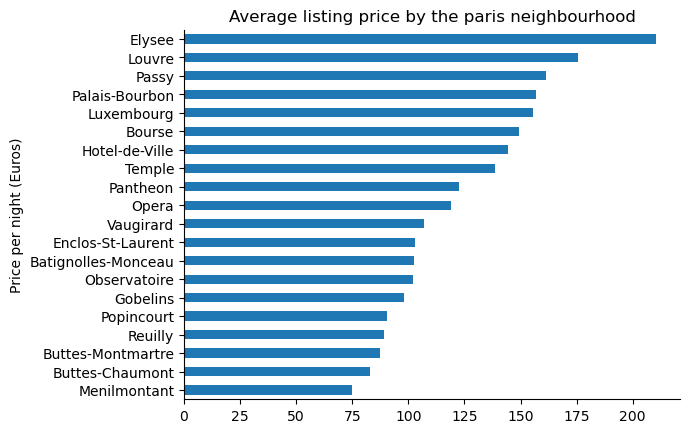

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

paris_listings_neighbourhood.plot.barh(
     title="Average listing price by the paris neighbourhood",
     xlabel="Price per night (Euros)",
     ylabel="Neighbourhood",
     legend=None #remove price legend on the chart
)


sns.despine() #remove the top the right borders of the barchart

plt.show()

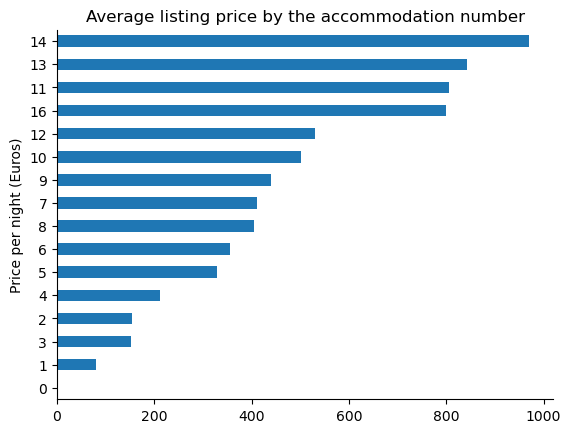

In [64]:
paris_listings_accommodates.plot.barh(
     title="Average listing price by the accommodation number",
     xlabel="Price per night (Euros)",
     ylabel="Accomodation Capacity",
     legend=None #remove price legend on the chart
)


sns.despine() #remove the top the right borders of the barchart

plt.show()

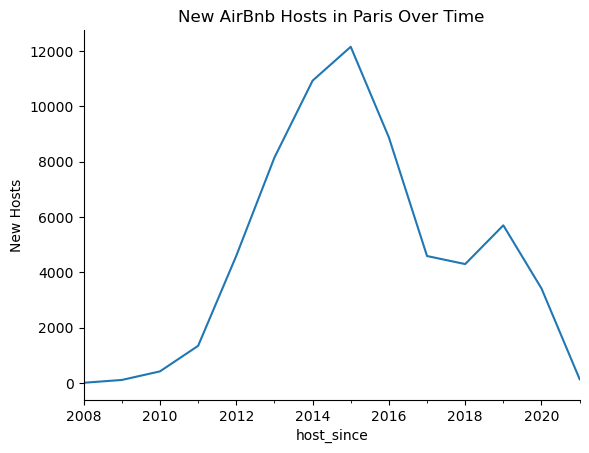

In [66]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBnb Hosts in Paris Over Time"
)

sns.despine()

#The decline in new hosts could be due to city wide regulations on who can be a host

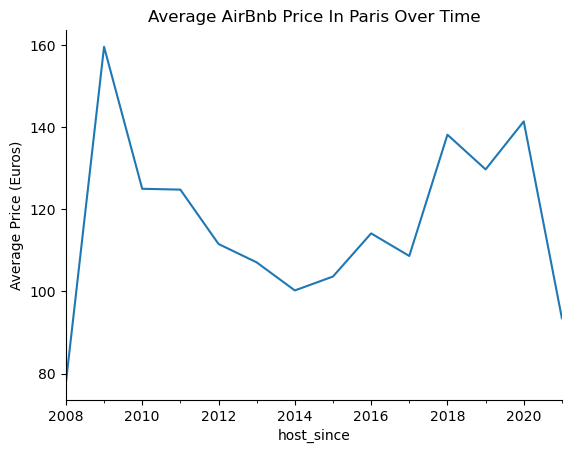

In [67]:
paris_listings_over_time["price"].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBnb Price In Paris Over Time"
)

sns.despine()

#The decline in price could be due to competition, however, when the regulations came into play, we can assume that average price shot up due to fewer competition, and then it might've declined again when COVID-19 happened after 2019

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, and Higher Prices')

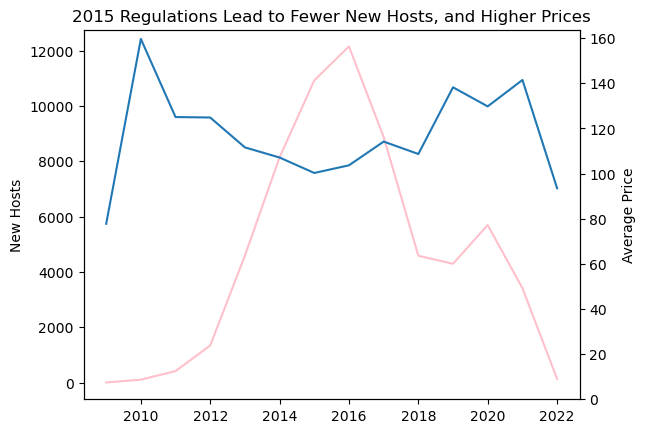

In [74]:
#Dual Axis Charts to combine the last two charts
fig, ax = plt.subplots()
#fig is the entire image, and ax is the chart in that image
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx() #set up the second chart on the right hand side of the chart

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price"
)

ax2.set_ylim(0) #sets the starting point of the chart to zero for Average Price

ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Lead to Fewer New Hosts, and Higher Prices")

#shows the correlation between price and new hosts when factors like regulations and COVID-19 are introduced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

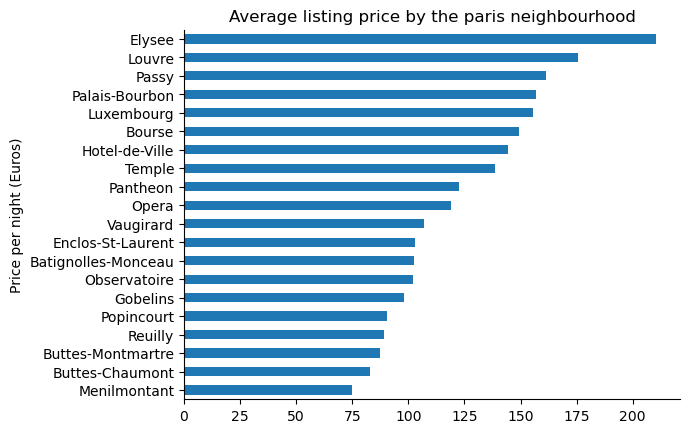

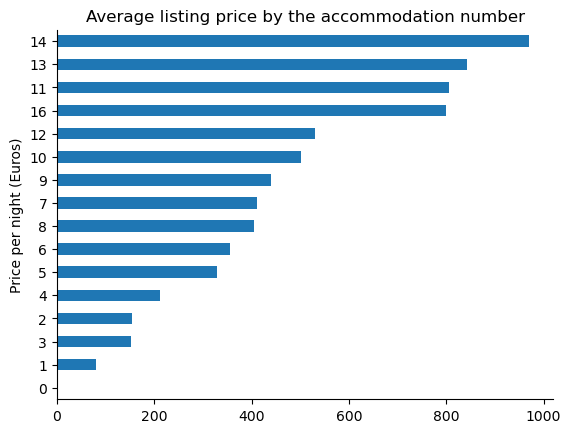

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, and Higher Prices')

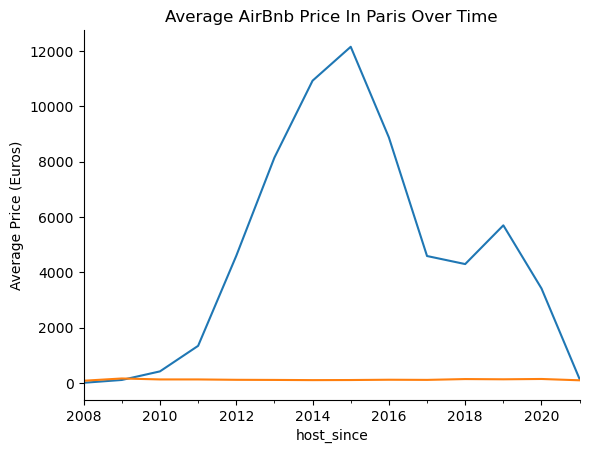

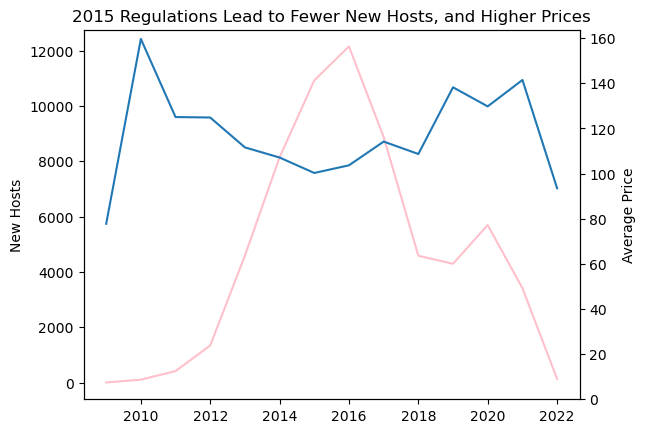

In [75]:
#Complete Code:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

listings = pd.read_csv("Listings.csv", 
                       encoding="ISO-8859-1", 
                       low_memory=False,
                        parse_dates=["host_since"])

listings.info()

paris_listings = listings.query("city == 'Paris'")[["host_since", "neighbourhood", "city", "accommodates", "price"]]
paris_listings.info()

paris_listings.isna().sum()
#ignoring the 33 missing values since it wouldn't negatively affect the analysis due to the missing values being such a small fraction of the dataset

paris_listings.describe()
#finding the key statistics

paris_listings.query("accommodates == 0")
#count()
#accommodates and price are both zero, meaning the listing could be incomplete

paris_listings_neighbourhood =  (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
)
paris_listings_neighbourhood

#grouped paris listings by "neighbourhood" and calculated the mean price for each neighbourhood sorted from the lowest to the highest average price

paris_listings_accommodates =  (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    #.agg({"price": "mean", "neighbourhood": "count"})
    .sort_values("price")
)
paris_listings_accommodates

#grouped the Elysee neighbourhood listings by their accommodation amount sorted by the average mean prices of those listings in ascending order

paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood": "count",
        "price": "mean"
    })
)
paris_listings_over_time

#Time series Analysis - focusing on the number of listings and average price per year.

paris_listings_neighbourhood.plot.barh(
     title="Average listing price by the paris neighbourhood",
     xlabel="Price per night (Euros)",
     ylabel="Neighbourhood",
     legend=None #remove price legend on the chart
)


sns.despine() #remove the top the right borders of the barchart

plt.show()

paris_listings_accommodates.plot.barh(
     title="Average listing price by the accommodation number",
     xlabel="Price per night (Euros)",
     ylabel="Accomodation Capacity",
     legend=None #remove price legend on the chart
)


sns.despine() #remove the top the right borders of the barchart

plt.show()

paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBnb Hosts in Paris Over Time"
)

sns.despine()

#The decline in new hosts could be due to city wide regulations on who can be a host

paris_listings_over_time["price"].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBnb Price In Paris Over Time"
)

sns.despine()

#The decline in price could be due to competition, however, when the regulations came into play, we can assume that average price shot up due to fewer competition, and then it might've declined again when COVID-19 happened after 2019

#Dual Axis Charts to combine the last two charts
fig, ax = plt.subplots()
#fig is the entire image, and ax is the chart in that image
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx() #set up the second chart on the right hand side of the chart

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price"
)

ax2.set_ylim(0) #sets the starting point of the chart to zero for Average Price

ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Lead to Fewer New Hosts, and Higher Prices")

#shows the correlation between price and new hosts when factors like regulations and COVID-19 are introduced